# Exercise 3
### Anton Wiehe & Angelie Kraft

In [81]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Test image
im_frame = Image.open("positives/" + 'p01.png')
np_frame = np.array(im_frame.getdata())
print(len(np_frame))

# Load images (30, 573, 3) == (num_images, num_pixels, rgb)
positives = np.zeros((30, 576, 3))
for i in range(30):
    im_frame = Image.open("positives/" + 'p' + ('0' if (i+1) < 10 else '') + str(i + 1) + '.png')
    positives[i] = np.array(im_frame.getdata())
    
negatives = np.zeros((30, 576, 3))
for i in range(30):
    im_frame = Image.open("negatives/" + 'n' + ('0' if (i+1) < 10 else '') + str(i + 1) + '.png')
    negatives[i] = np.array(im_frame.getdata())
    

576


In [48]:
# get means of RGB values for each image: one tuple of three values per image
def get_RGB_means(images):
    means = np.zeros((30,3))
    for i,img in enumerate(images):
        means[i] = np.mean(img, axis=0)
    return means

In [69]:
RGB_means_pos = get_RGB_means(positives)
RGB_means_neg = get_RGB_means(negatives)

In [70]:
RGB_overall_means_pos = np.zeros((30))
RGB_overall_means_neg = np.zeros((30))
RGB_overall_means_pos = np.mean(RGB_means_pos, axis=1)
RGB_overall_means_neg = np.mean(RGB_means_neg, axis=1)

In [55]:
def get_RGB_stds(images):
    stds = np.zeros((30,3))
    for i,img in enumerate(images):
        stds[i] = np.std(img, axis=0)
    return stds

In [68]:
RGB_stds_pos = get_RGB_stds(positives)
RGB_stds_neg = get_RGB_stds(negatives)

In [72]:
# We now have sample images (positive and negative) represented by 7-tuples:
# [mean R, mean G, mean B, mean of RGB means, std of R, std of G, std of B]
samples_pos = np.column_stack((RGB_means_pos,RGB_overall_means_pos,RGB_stds_pos))
samples_neg = np.column_stack((RGB_means_neg,RGB_overall_means_neg,RGB_stds_neg))

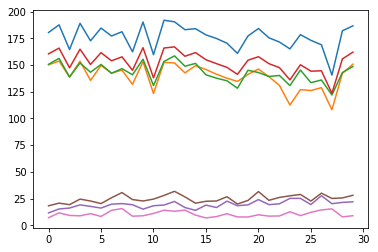

In [82]:
plt.plot(samples_pos)

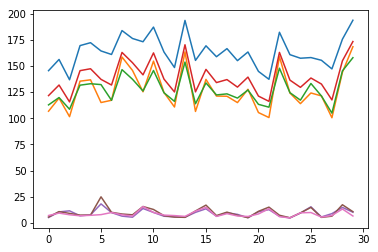

In [83]:
plt.plot(samples_neg)

In [76]:
def calc_mu(samples):
    return np.sum(samples, axis=0) / len(samples)

mu_pos = calc_mu(samples_pos)
mu_neg = calc_mu(samples_neg)

array([163.71302083, 126.82800926, 127.34149306, 139.29417438,
         9.15690078,   9.9563192 ,   8.52678672])

In [132]:
def calc_Sigma(samples):
    diff = np.array([x - mu_pos for x in samples])
    Sigma = np.matmul(diff, np.transpose(diff))
    return diff, Sigma

diff_pos,Sigma_pos = calc_Sigma(samples_pos)
diff_neg,Sigma_neg = calc_Sigma(samples_neg)


In [137]:
p_x_pos = (1/((2*np.pi)**(7/2))*np.sqrt(np.linalg.det(Sigma_pos)))**(np.matmul(diff_pos, np.transpose(diff_pos))/2*Sigma_pos**(-1))

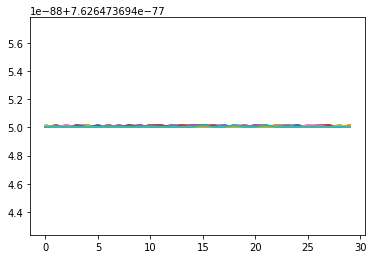

In [138]:
plt.plot(p_x_pos)